# Figure 8: Cross-rack network traffic

## Load session data

In [2]:
from chi import ssh
import scripts.session as session
import scripts.ssh_helper as ssh_helper

session_data = session.load()
floating_ip = session_data["floating_ip"]
print("Got floating_ip: {}".format(floating_ip))

Got floating_ip: 129.114.108.121


## Experiment

In [13]:
with ssh.Remote(floating_ip) as conn:
    print("Now we run the experiments for Figure 8")
    conn.run("source ~/.bashrc && cd sc23-mlec/scripts/fig8 && bash exp.sh")

Now we run the experiments for Figure 5
Running experiments for...
CP-CP
CP-DP
DP-CP
DP-DP
done


## Fetch results

Fetch the results (data points) from remote server to this container

In [14]:
with ssh.Remote(floating_ip) as conn:
    for rs in range(4):
        conn.get("/home/cc/mlec-sim/src/results/fig8/scheme-{}.dat".format(rs), "data/fig8/scheme-{}.dat".format(rs))
        # conn.run("rm /home/cc/mlec-sim/src/results/fig8/scheme-{}.dat".format(rs))

## Plotting

We now plot Figure 8 based on experiment results

Plotting Figure 8...


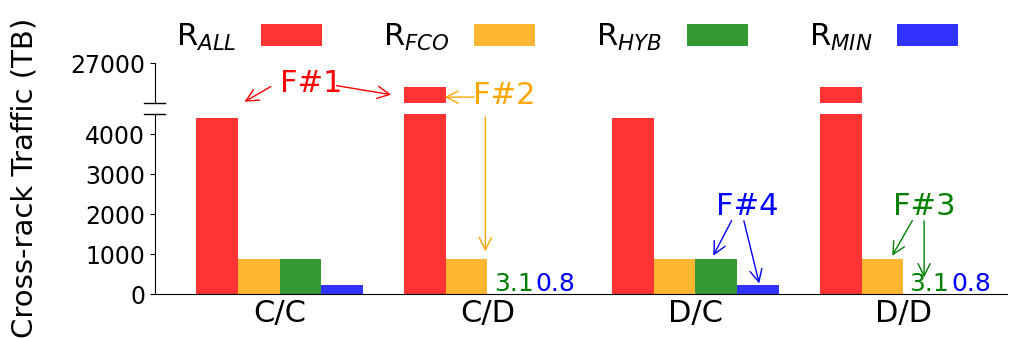

In [3]:
from IPython.display import Image
!mkdir -p plots/fig8

print("Plotting Figure 8...")
!python3 scripts/fig8/plot.py plots/fig8/fig8.png
Image(filename='plots/fig8/fig8.png', width=600)
